In [1]:
# https://github.com/voila-gallery/voila-spotify/blob/master/Spotify_viewer.ipynb

import pandas as pd
import os, json, datetime
import matplotlib.pyplot as plt
import spotify_fcns as sfy
from calendar import monthrange
import numpy as np
from sklearn.preprocessing import MinMaxScaler

week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
full_weekdays = {'Sun': 'Sunday', 'Mon': 'Monday', 'Tue': 'Tuesday', 
                 'Wed': 'Wednesday', 'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday'}
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

plt.rcParams['font.size'] = 14

tzd = -6

# for multiple files from different downloads, find way to join then

In [2]:
sp_df = sfy.getData('MyData')
sp_df

1209 plays found across 1 files.


,endTime,artistName,trackName,msPlayed
0,2021-01-01 20:02,OneRepublic,Better,204386
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000
3,2021-01-01 20:13,Stromae,ave cesaria,249520
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666
...,...,...,...,...
1204,2021-02-09 18:20,Jon Bellion,All Time Low,217603
1205,2021-02-09 18:24,AJR,My Calling,236400
1206,2021-02-09 20:10,Bastille,Good Lesson,210933
1207,2021-02-09 20:13,American Authors,I Wanna Go Out,186000


In [3]:
artist_counts = sp_df['artistName'].value_counts()
artist_counts[ artist_counts > 20 ]

Justin Timberlake      171
OneRepublic            115
Bastille                74
Taylor Swift            63
Shawn Mendes            56
Jon Bellion             47
Imagine Dragons         46
Panic! At The Disco     43
Train                   29
Twenty One Pilots       25
Charlie Puth            24
Zedd                    22
Name: artistName, dtype: int64

In [4]:
track_counts = sp_df['trackName'].value_counts()
track_counts[ track_counts > 10 ]

Mirrors                                       46
Teach Me How To Love                          29
Drive By                                      27
All Time Low - Acoustic                       26
I Know Places                                 24
LoveStoned / I Think She Knows (Interlude)    20
All Time Low                                  20
slow motion                                   18
My Love (feat. T.I.)                          16
Fire                                          15
Beautiful Now                                 15
I've Gotta Be Me                              15
Gone, Gone, Gone                              14
Good Life                                     14
FRIENDS                                       14
More Than You Know                            14
Say Something (feat. Chris Stapleton)         13
Nothin' Else                                  13
Unknown Track                                 12
Chasing The Sun                               12
Made For You        

In [5]:
sp_df['msPlayed'].sum() / 1000 / 60 # minutes

4506.101033333333

In [6]:
sp_df[ sp_df['artistName'] == 'OneRepublic' ]['msPlayed'].sum() / 1000 / 60 # minutes

406.1956

In [7]:
# minutes played
(sp_df.groupby(['artistName'])['msPlayed'].sum() / 1000 / 60).sort_values(ascending=False)[:15]

artistName
Justin Timberlake      986.205317
OneRepublic            406.195600
Bastille               245.144817
Taylor Swift           213.585050
Shawn Mendes           175.251733
Jon Bellion            165.307850
Imagine Dragons        162.599167
Panic! At The Disco    126.572917
Twenty One Pilots       89.237950
Train                   86.438217
Charlie Puth            80.348933
Zedd                    75.933667
Avicii                  73.708867
Beyoncé                 64.533517
Ed Sheeran              64.315383
Name: msPlayed, dtype: float64

In [8]:
sp_df[ sp_df['artistName'] == 'Justin Timberlake' ]['trackName'].value_counts()

Mirrors                                                                         46
LoveStoned / I Think She Knows (Interlude)                                      20
My Love (feat. T.I.)                                                            16
Say Something (feat. Chris Stapleton)                                           13
Nothin' Else                                                                    13
Rock Your Body                                                                  11
Cry Me a River                                                                   8
Until the End of Time                                                            8
SexyBack (feat. Timbaland)                                                       5
Chop Me Up (feat. Timbaland & Three-6 Mafia)                                     5
Medley: Let Me Talk to You / My Love (feat. T.I.)                                4
What Goes Around.../...Comes Around (Interlude)                                  4
CAN'

In [9]:
sp_df['Month'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).month)
sp_df['Date'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).day)
sp_df['Year'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).year)
sp_df['Day'] = sp_df['endTime'].apply(lambda x: week_days[(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).weekday()])
sp_df['Hour'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).hour)
sp_df

,endTime,artistName,trackName,msPlayed,Month,Date,Year,Day,Hour
0,2021-01-01 20:02,OneRepublic,Better,204386,1,1,2021,Fri,14
1,2021-01-01 20:05,OneRepublic,Love Runs Out,224226,1,1,2021,Fri,14
2,2021-01-01 20:09,Axwell /\ Ingrosso,More Than You Know,203000,1,1,2021,Fri,14
3,2021-01-01 20:13,Stromae,ave cesaria,249520,1,1,2021,Fri,14
4,2021-01-01 20:15,Panic! At The Disco,Emperor's New Clothes,158666,1,1,2021,Fri,14
...,...,...,...,...,...,...,...,...,...
1204,2021-02-09 18:20,Jon Bellion,All Time Low,217603,2,9,2021,Tue,12
1205,2021-02-09 18:24,AJR,My Calling,236400,2,9,2021,Tue,12
1206,2021-02-09 20:10,Bastille,Good Lesson,210933,2,9,2021,Tue,14
1207,2021-02-09 20:13,American Authors,I Wanna Go Out,186000,2,9,2021,Tue,14


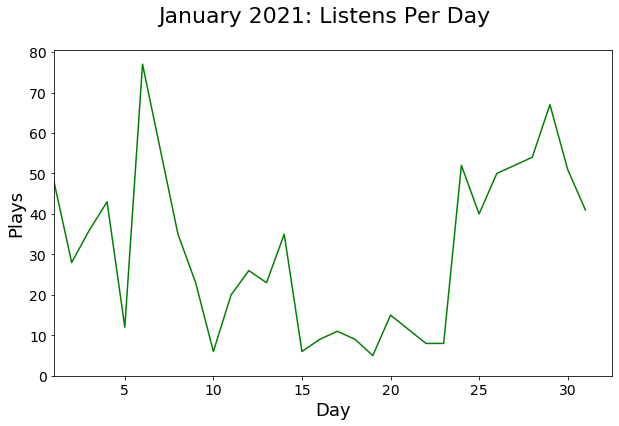

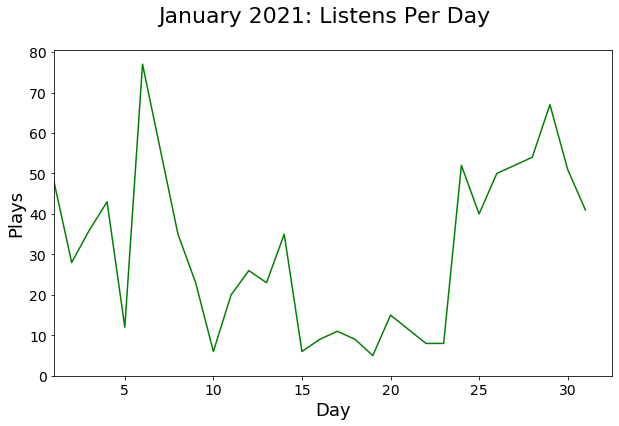

In [10]:
sfy.listensPerDay(sp_df, 1, 2021)

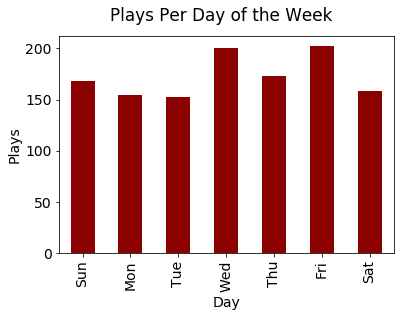

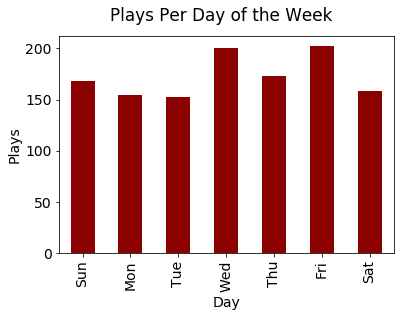

In [11]:
# plays per day of week
sfy.playsDayWeek(sp_df) 

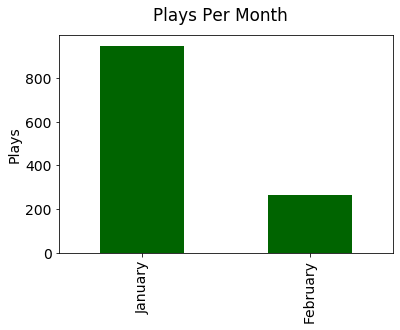

In [12]:
# total per month
sfy.totalMonth(sp_df);

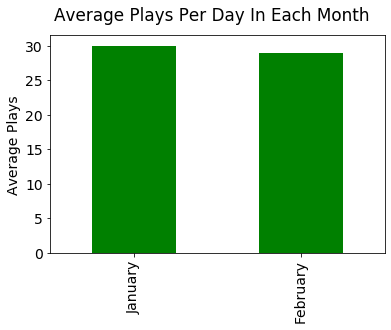

In [13]:
# average per day per month
sfy.avgDayPerMonth(sp_df);

In [14]:
# plays/time per day

# total number of days
stt = datetime.datetime.strptime(sp_df.loc[0]['endTime'].split()[0], '%Y-%m-%d')
end = datetime.datetime.strptime(sp_df.loc[len(sp_df)-1]['endTime'].split()[0], '%Y-%m-%d')
# (end-stt).days # total days

# minutes per day
minutes = sp_df['msPlayed'].sum() / 1000 / 60
minutes_per_day = minutes / (end-stt).days
print("{:.2f} minutes per day".format(minutes_per_day))

# plays per day
plays_per_day = len(sp_df) / (end-stt).days
print("{:.1f} plays per day".format(plays_per_day))

115.54 minutes per day
31.0 plays per day


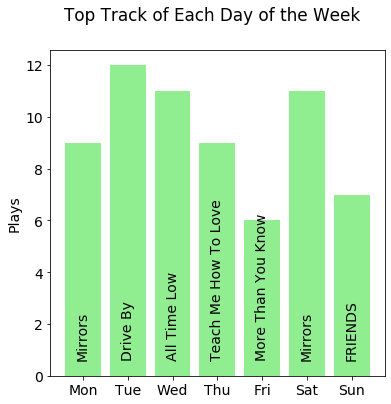

In [15]:
# top tracks by day of week
sfy.topTrackByDay(sp_df);

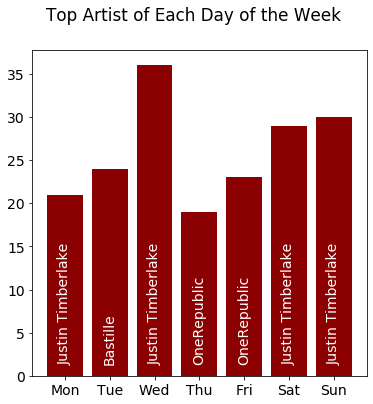

In [16]:
# top artist(s) by day of week
sfy.topArtistByDay(sp_df);

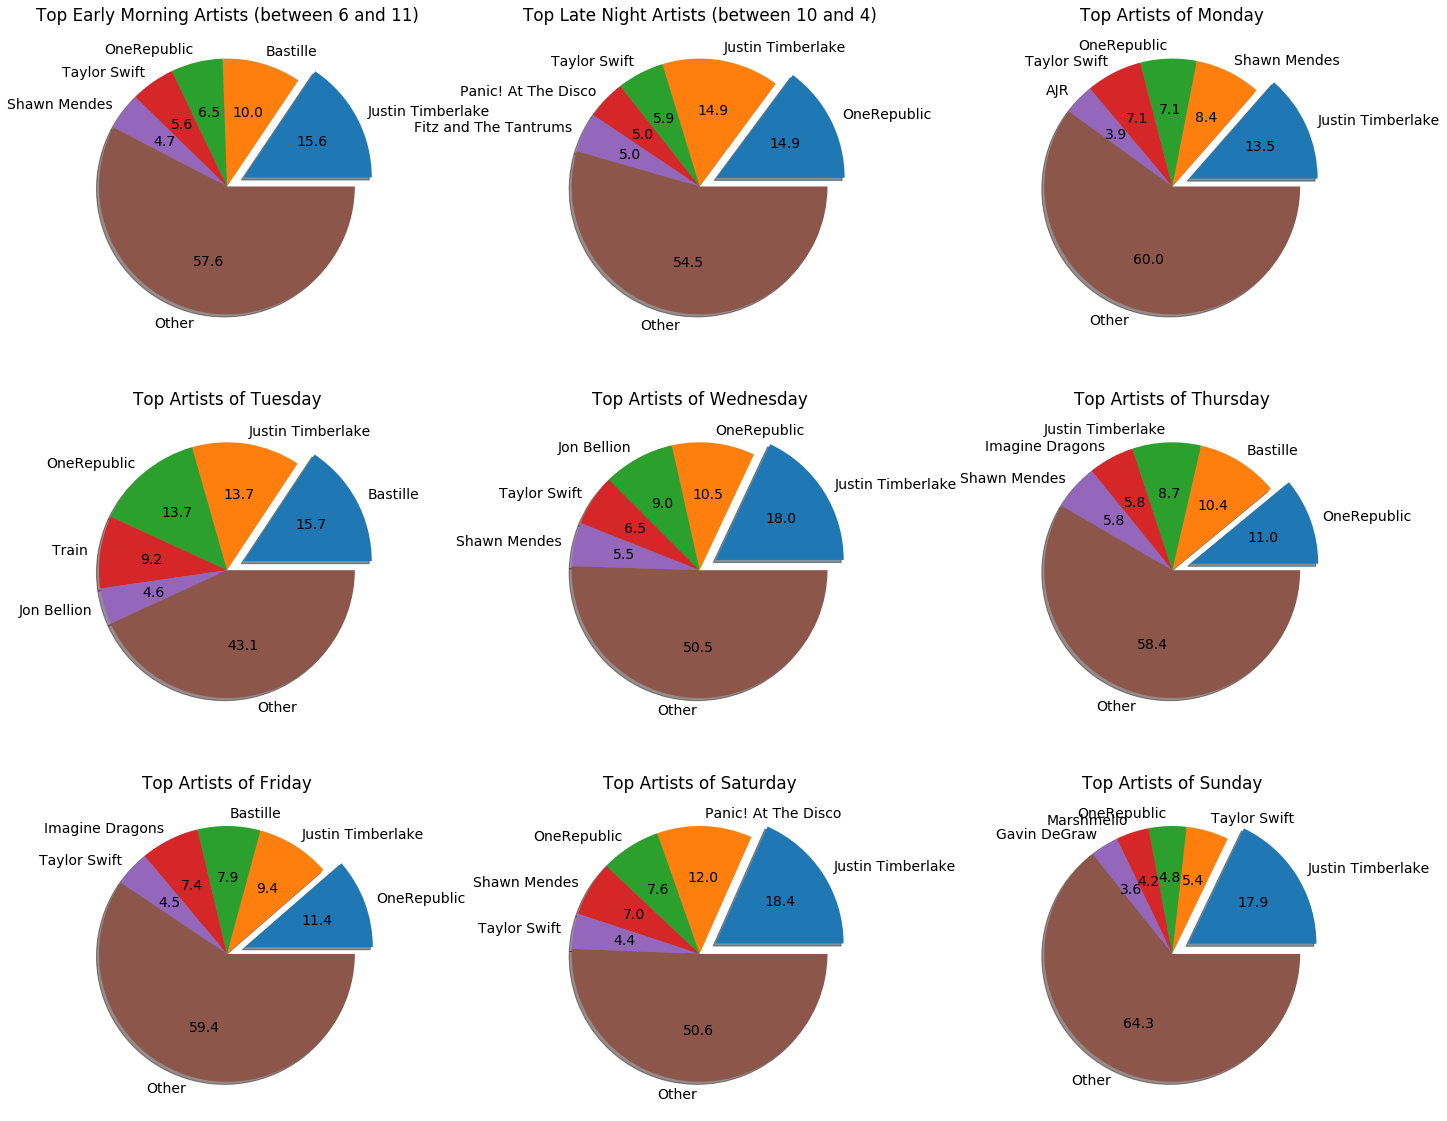

In [17]:
# top artist(s) by day of week
sfy.topArtistByDayPie(sp_df);

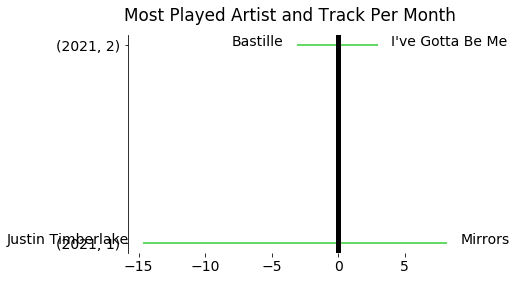

In [18]:
# top artist and track for each month

tr_gb = sp_df.groupby(['Year', 'Month'])['trackName'].value_counts()
ar_gb = sp_df.groupby(['Year', 'Month'])['artistName'].value_counts()

months = pd.unique(list(zip(sp_df['Year'], sp_df['Month'])))# [::-1]
artists = [ar_gb[m].index[0] for m in months]
ap = pd.Series([ar_gb[m][0] for m in months])
tracks = [tr_gb[m].index[0] for m in months]
tp = pd.Series([tr_gb[m][0] for m in months])

ap = ap * -1 / 10
tp = tp / 5

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(len(months))), ap, tp, color='limegreen') # plot horizontal lines
plt.yticks(list(range(len(months))), months)
# plt.xticks([], [])
plt.suptitle('Most Played Artist and Track Per Month')

for i, m_d in enumerate(months):
    ax.annotate(tracks[i], xy=(tp[i], i), xytext=(tp[i]+1, i))
    ax.annotate(artists[i], xy=(ap[i], i), xytext=(ap[i]-1, i), ha='right') # xy for end?
    

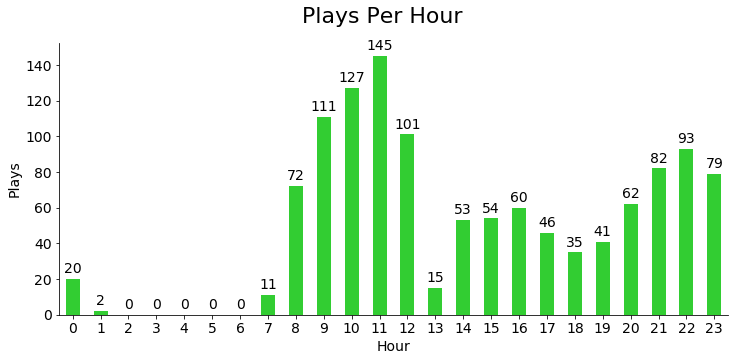

In [19]:
# plays by hour
sfy.playsByHour(sp_df);

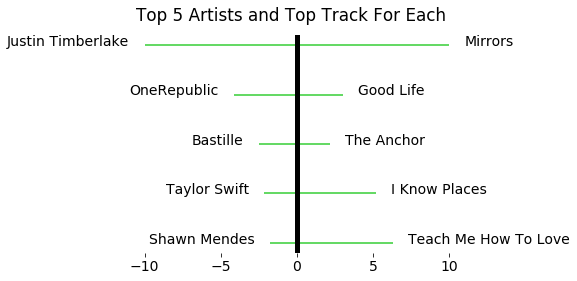

In [20]:
# similar stem/timeline for artists and top song by them

# other possible idea
# two bar plots
# 'Top x Artists' on left
# top song by artist on right

a_gb = sp_df.groupby('artistName')
ar_gb = sp_df.groupby(['artistName', 'trackName'])

# left
top_5_artists = (a_gb['msPlayed'].sum() / 1000 / 60 / 60).sort_values(ascending=False)[:5][::-1] # hours
a_gb['msPlayed'].count().sort_values(ascending=False) # plays
top_5_artists_i = top_5_artists.index

# right
ar_gb['msPlayed'].sum() / 1000 / 60 / 60
right = ar_gb['msPlayed'].count()

track_plays = []
top_tracks = []
for artist in top_5_artists.index:
    track_plays.append(right.loc[artist].sort_values(ascending=False)[0])
    top_tracks.append(right.loc[artist].sort_values(ascending=False).index[0])

# scale all values to 0 to 10 range
#scaler = MinMaxScaler(feature_range=(0,10))
#track_plays = scaler.fit_transform(np.array(track_plays).reshape(-1,1))

#scaler = MinMaxScaler(feature_range=(0,10))
#top_5_artists = scaler.fit_transform(np.array(top_5_artists).reshape(-1,1))

m = np.array(track_plays).max()
track_plays = np.array(track_plays) / (m * 0.1)

top_5_artists = top_5_artists / (top_5_artists.max() * 0.1)

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(5)), top_5_artists*-1, track_plays, color='limegreen') # plot horizontal lines

plt.yticks([], [])
# plt.xticks([], []) # use this to center around 0
plt.suptitle('Top 5 Artists and Top Track For Each')

for i, m_d in enumerate(range(5)):
    ax.annotate(top_tracks[i], xy=(track_plays[i], i), xytext=(track_plays[i]+1, i))
    ax.annotate(top_5_artists_i[i], xy=(top_5_artists[i]*-1, i), xytext=((top_5_artists[i]*-1)-1, i), ha='right') # xy for end?

In [21]:
# same with snapchat data?